In [10]:
# interesting fact

a = 1; b = 2; c = 3
b = a;
print(a, b, " ok...")

import copy as c
x = [5,7]
y = x
y[0] = 6
print(x, y, " oops!")

x = [5,7]
y = c.copy(x)
y[0] = 6
print(x, y, " fixed")

1 1  ok...
[6, 7] [6, 7]  oops!
[5, 7] [6, 7]  fixed


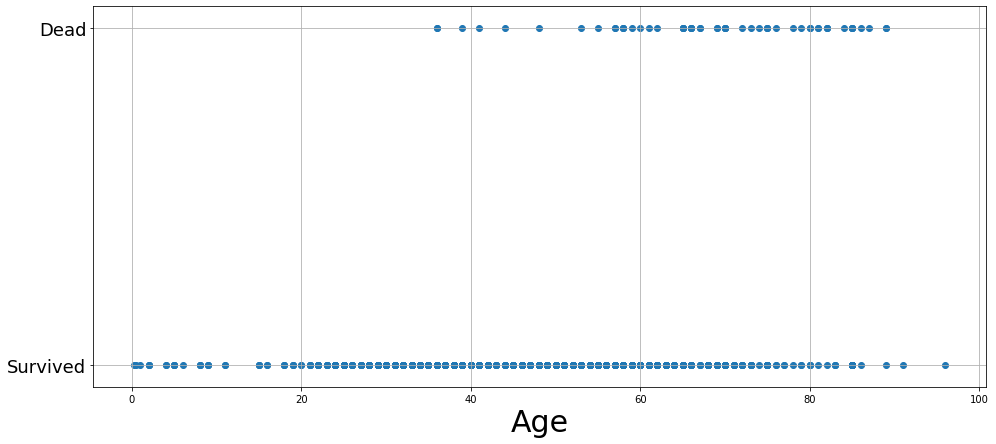

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid = pd.read_csv("datasets/covid19_list.csv") # get a dataframe

dead_list = []
age_list = []
for i in range(len(covid)):
    
    dead = covid.iloc[i].loc["death"] #  row by row in death column
    age = covid.iloc[i].loc["age"]  # row by row in age column
    
    if  age != 'nan':
        if dead == '0':
            # if alive, append 0 to dead_list and age to age list. if dead = append 1
            # both lists will have data at the same index
            # dead list will only have 0 and 1 values. we will use in the graph as "dead" and "survived"
            dead_list.append(0) 
            age_list.append(age) 
        else:
            dead_list.append(1)
            age_list.append(age)

fig, ax = plt.subplots()

x = np.array(dead_list)
y = np.array(age_list)
ax.scatter(y, x)
ax.set_xlabel("Age",fontsize=30)
ax.set_yticks([0,1]) 
ax.set_yticklabels(["Survived","Dead"],fontsize=18)
plt.grid()
plt.gcf().set_size_inches(16,7)

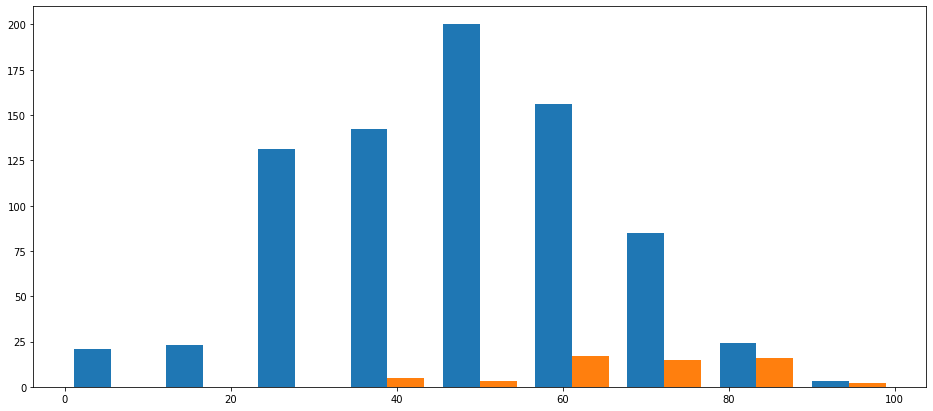

In [12]:

died = []
survived = []
for i in range(len(covid)):
    dead = covid.iloc[i].loc["death"]
    age = covid.iloc[i].loc["age"]
    if  age != 'nan':
        if dead == '0':
            survived.append(age)
        else:
            died.append(age)

x = np.array(died)
y = np.array(survived)
bins = np.linspace(0, 100, 10)
plt.hist([y,x], bins)
plt.gcf().set_size_inches(16,7)

Counts:  [array([ 0.,  0.,  0.,  3.,  3.,  8., 15., 13., 16.,  0.]), array([ 19.,  13.,  95., 146., 124., 175., 121.,  68.,  22.,   2.])] 


Binedges:  [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.] 


Bins:  [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


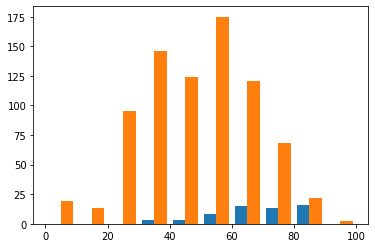

In [13]:
# get data from histogram to know how large the circle must be at which position

bins = np.linspace(0, 100, 11) # now let's do 11 evenly spaced values between 0 and 100, 
                                    # so we will have 10 bins on hist, not 9 (0 does not count i guess)

# get data from histogram and store into 2d numpy array (2d because we passed both y and x)
# note: we can only extract date all at once (getting all counts, binedges and thplot together, although
#      we might only need 1-2 of them)
counts, binedges, theplot = plt.hist([x,y], bins) # x is index 0, y is index 1. [x,y] -> to plot 2 lists at once
print("Counts: ", counts, "\n\n") # number of dead/survived per position. basically how tall are the bins
print("Binedges: ", binedges, "\n\n") # position location. 
    # we already have binedges -> bins! but let's still use binedges
print("Bins: ", bins)

In [14]:
bincenters = (binedges[:-1]+binedges[1:])/2 # returns positions where the circle centers will be


# let's make graph with 4 "yticks"(0,1,2,3) and place survived on value 1 and dead on value 2. so it looks nice
fake_list = [[],[]]
# fakelist at y value 1 and 2 creates 10 positions on x axes. 
print(len(bincenters)) # must be 10 in our case. we could just say 10, but in reality it is not always obviously
fake_list[0] = [2 for i in range(len(bincenters))]
print(fake_list[0])
fake_list[1] = [1 for i in range(len(bincenters))] 
print(fake_list[1])


10
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


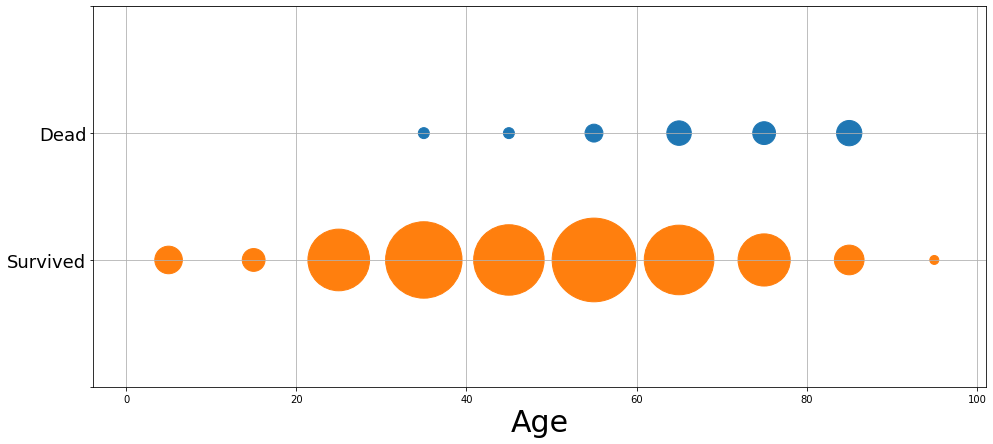

In [17]:
fig, ax = plt.subplots()

plt.scatter(bincenters, fake_list[0], s = counts[0] * 40) # s is size of a circle
plt.scatter(bincenters, fake_list[1], s = counts[1] * 40)

ax.set_xlabel("Age", fontsize=30)
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(["","Survived","Dead",""],fontsize=18) # only label value 1 and 2 on y axes

plt.grid()
plt.gcf().set_size_inches(16,7)